In [6]:
import MEArec as mr
import numpy as np
import matplotlib.pylab as plt
from pprint import pprint
import yaml 
%matplotlib notebook

In [2]:
info, _ = mr.get_default_config()
with open(info['recordings_params']) as f:
    rec_params = yaml.load(f, Loader=yaml.FullLoader)
pprint(rec_params)

{'cell_types': {'excitatory': ['STPC', 'TTPC1', 'TTPC2', 'UTPC'],
                'inhibitory': ['BP',
                               'BTC',
                               'ChC',
                               'DBC',
                               'LBC',
                               'MC',
                               'NBC',
                               'NGC',
                               'SBC']},
 'recordings': {'angle_tol': 15,
                'bursting': False,
                'bursting_fc': [1000.0, 12000.0],
                'chunk_filter_duration': 0,
                'chunk_noise_duration': 0,
                'color_peak': 500,
                'color_q': 1,
                'drift_velocity': 5,
                'drifting': False,
                'exp_decay': 0.2,
                'extract_waveforms': False,
                'filter': True,
                'filter_cutoff': [300, 6000],
                'filter_order': 3,
                'fs': None,
                'mem_isi': 100,

In [12]:
# change parameters
rec_params['spiketrains']['n_exc'] = 30
rec_params['spiketrains']['n_inh'] = 10
rec_params['templates']['max_amp'] = 300
rec_params['recordings']['duration'] = 20

# set seeds
rec_params['spiketrains']['seed'] = np.random.randint(1000)
rec_params['templates']['seed'] = np.random.randint(1000)

# select templates
template_file = '/home/alessiob/Documents/Codes/MEArec/data/templates/physrot/templates_100_Neuronexus-32_20-03-2019.h5'

rec_params['recordings']['drifting'] = False
rec_params['recordings']['noise_mode'] = 'uncorrelated'
noise_levels = [5, 10, 15, 20, 25, 30, 50]

recgen_list = []

for n in noise_levels:
    print('Noise level: ', n)
    rec_params['recordings']['noise_level'] = n
    recgen = mr.gen_recordings(templates=template_file, params=rec_params, verbose=False)
    recgen_list.append(recgen)

Noise level:  5
Elapsed time:  2.992279529571533
Noise level:  10
Elapsed time:  2.8939597606658936
Noise level:  15
Elapsed time:  3.187981128692627
Noise level:  20
Elapsed time:  2.8679025173187256
Noise level:  25
Elapsed time:  2.9486637115478516
Noise level:  30
Elapsed time:  2.8251876831054688
Noise level:  50
Elapsed time:  3.161872386932373


<IPython.core.display.Javascript object>


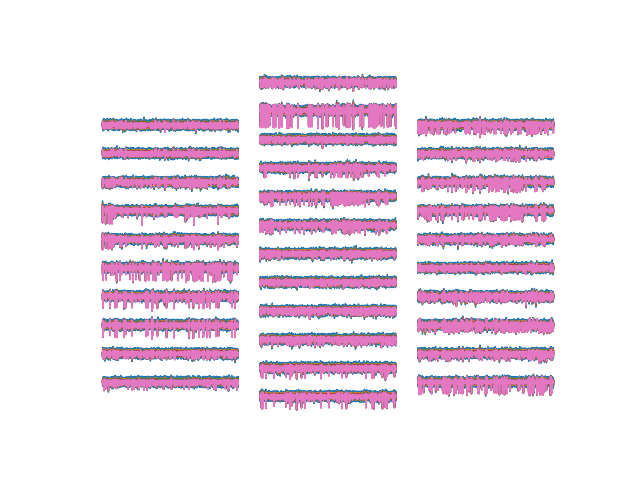

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
n_samples = int(5 * 32000) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, recgen in enumerate(recgen_list[::-1]):
    mr.plot_recordings(recgen, ax=ax, end_frame=n_samples, colors=colors[i])

In [4]:
# simulate different drifting velocities
# change parameters
rec_params['spiketrains']['n_exc'] = 10
rec_params['spiketrains']['n_inh'] = 5
rec_params['templates']['max_amp'] = 300
rec_params['recordings']['duration'] = 20

# set seeds
rec_params['spiketrains']['seed'] = np.random.randint(1000)
rec_params['templates']['seed'] = np.random.randint(1000)

# select templates
template_file_drift = '/home/alessiob/Documents/Codes/MEArec/data/templates/physrot/templates_30_Neuronexus-32_drift_22-03-2019.h5'

rec_params['recordings']['noise_mode'] = 'uncorrelated'
rec_params['recordings']['noise_level'] = 20

rec_params['recordings']['drifting'] = True
drift_velocities = [10, 30, 100, 300]

recgen_list_drift = []

for d in drift_velocities:
    print('Drifting velocity: ', d)
    rec_params['recordings']['drift_velocity'] = d
    recgen = mr.gen_recordings(templates=template_file_drift, params=rec_params, verbose=True)
    recgen_list_drift.append(recgen)

Drifting velocity:  10


/home/alessiob/.virtualenvs/mearec/lib/python3.6/site-packages/quantities-0.12.3-py3.6.egg/quantities/quantity.py:321: RuntimeWarning: divide by zero encountered in true_divide


Elapsed time:  18.88604211807251
Drifting velocity:  30
Elapsed time:  17.90522050857544
Drifting velocity:  100
Elapsed time:  17.643938302993774
Drifting velocity:  300
Elapsed time:  17.576073169708252


<IPython.core.display.Javascript object>


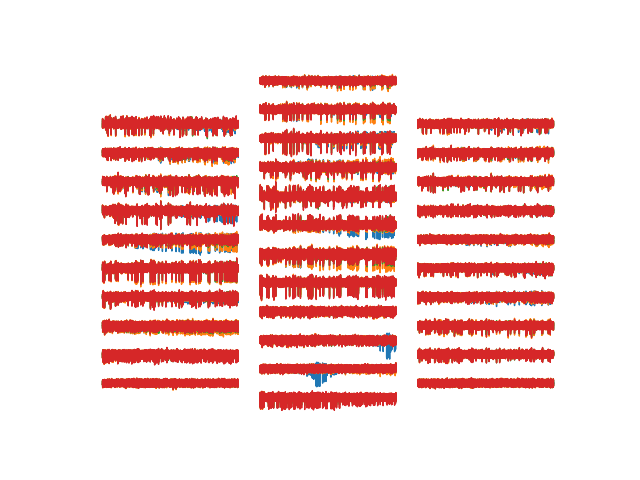

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
n_samples = int(20 * 32000) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, recgen in enumerate(recgen_list_drift[::-1]):
    mr.plot_recordings(recgen, ax=ax, end_frame=n_samples, colors=colors[i])